In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

First, get the essentiality data from FAR's Tn-Seq experiments

In [3]:
essentiality = pd.read_csv('../pangenome/Essentials2020/tnseq_processing/Essentials.csv')
essentiality.head()

,Cluster,MCL_Sub,Strain,Genome,locus,Start,End,Strand,Product,Total.Insertions,Total.Sites,zbar,Binomial.Call,HMM.Call,locus_TIGR4,Old_locus_TIGR4,locus_D39,locus_Taiwan19F
0,2080,2080_0,PG18,CP035250,EQH30_00005,0,1362,1,chromosomal replication initiator protein DnaA,0,88,1.0,Essential,ES,SP_RS00005,SP_0001,SPD_RS00005,SPT_RS00035
1,2080,2080_0,PG06,CP035260,EQH20_00005,0,1362,1,chromosomal replication initiator protein DnaA,4,87,1.0,Essential,ES,SP_RS00005,SP_0001,SPD_RS00005,SPT_RS00035
2,2080,2080_0,PG27,CP035243,EQH37_00005,0,1362,1,chromosomal replication initiator protein DnaA,3,87,1.0,Essential,ES,SP_RS00005,SP_0001,SPD_RS00005,SPT_RS00035
3,2080,2080_0,PG28,CP035242,EQH38_00005,0,1362,1,chromosomal replication initiator protein DnaA,3,86,1.0,Essential,ES,SP_RS00005,SP_0001,SPD_RS00005,SPT_RS00035
4,2080,2080_0,PG25,CP038251,ES300_00005,0,1362,1,chromosomal replication initiator protein DnaA,7,87,1.0,Essential,ES,SP_RS00005,SP_0001,SPD_RS00005,SPT_RS00035


In [4]:
set(essentiality['Binomial.Call'])

{'Essential', 'Non-Essential', 'Uncertain'}

While most genes are predicted as essential or non-essential based on the zbar value unambiguously (zbar = 0 or zbar = 1), there are uncertain calls that are around zbar ~0.5. But these are orders of magnitude smaller. 

[]

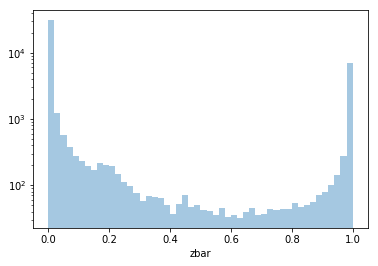

In [5]:
sns.distplot(essentiality.zbar, kde = False, norm_hist = False)
plt.semilogy()

Generate essentialome-distance matrix using euclidean distance between zbar values

In [6]:
essentiality_wide = essentiality.pivot_table(index = "MCL_Sub",
                                            columns = "Strain",
                                            values = "zbar")

essentiality_wide.head()

Strain,BHN97,CT-22F,D39-AC1770,PG01,PG02,PG04,PG06,PG09,PG12,PG13,...,PG18,PG21,PG22,PG24,PG25,PG27,PG28,PG29,TIGR4-AC316,Taiwan-19F
MCL_Sub,,,,,,,,,,,,,,,,,,,,,
1000_0,NaN,NaN,0.0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0007,NaN,NaN
1001_0,0.000,0.0000,0.0000,0.0000,0.0002,0.0000,0.0002,0.0001,0.0000,0.0000,...,0.0000,0.0000,0.0003,0.0033,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000
1002_0,1.000,0.9999,0.9999,0.9998,1.0000,1.0000,1.0000,0.9909,0.9992,1.0000,...,0.9951,0.9933,0.9878,0.9618,0.9998,0.9998,0.9994,0.9984,0.9900,0.9998
1004_0,0.989,0.9993,0.7869,1.0000,0.9980,1.0000,0.9918,0.7233,0.9612,0.9706,...,0.8629,0.8237,0.7712,0.6646,0.9958,0.9643,0.9988,0.8961,0.9925,0.9939
1005_0,0.000,0.0000,0.0000,0.0002,0.0006,0.0001,0.0001,0.0031,0.0000,0.0009,...,0.0004,0.0003,0.0012,0.0038,0.0000,0.0000,0.0000,0.0035,0.0000,0.0000


Since gene absence implies non-essentiality of the gene in that strain, replace NaN's with 0.

In [7]:
essentiality_wide.fillna(0, inplace=True)
essentiality_wide.head()

Strain,BHN97,CT-22F,D39-AC1770,PG01,PG02,PG04,PG06,PG09,PG12,PG13,...,PG18,PG21,PG22,PG24,PG25,PG27,PG28,PG29,TIGR4-AC316,Taiwan-19F
MCL_Sub,,,,,,,,,,,,,,,,,,,,,
1000_0,0.000,0.0000,0.0006,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0007,0.0000,0.0000
1001_0,0.000,0.0000,0.0000,0.0000,0.0002,0.0000,0.0002,0.0001,0.0000,0.0000,...,0.0000,0.0000,0.0003,0.0033,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000
1002_0,1.000,0.9999,0.9999,0.9998,1.0000,1.0000,1.0000,0.9909,0.9992,1.0000,...,0.9951,0.9933,0.9878,0.9618,0.9998,0.9998,0.9994,0.9984,0.9900,0.9998
1004_0,0.989,0.9993,0.7869,1.0000,0.9980,1.0000,0.9918,0.7233,0.9612,0.9706,...,0.8629,0.8237,0.7712,0.6646,0.9958,0.9643,0.9988,0.8961,0.9925,0.9939
1005_0,0.000,0.0000,0.0000,0.0002,0.0006,0.0001,0.0001,0.0031,0.0000,0.0009,...,0.0004,0.0003,0.0012,0.0038,0.0000,0.0000,0.0000,0.0035,0.0000,0.0000


D:\defne\Apps\Anaconda\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


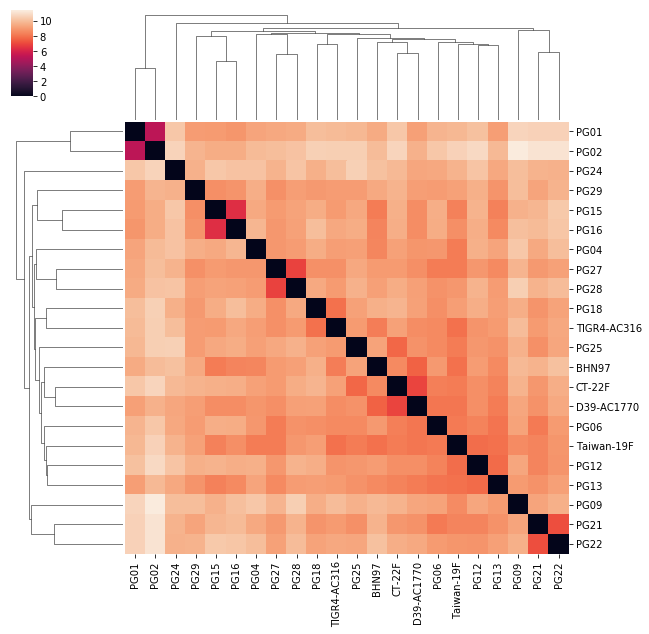

In [8]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform


essentiality_dist = pd.DataFrame(squareform(pdist(essentiality_wide.transpose(), metric = "euclidean")))
essentiality_dist.set_axis(list(essentiality_wide.columns), axis = 0, inplace = True)
essentiality_dist.set_axis(list(essentiality_wide.columns), axis = 1, inplace = True)
sns.clustermap(essentiality_dist)

Try a couple of other metrics, see if there is any big changes/rearrangements, whether the pairs (e.g. PG01 and PG02) are still together

D:\defne\Apps\Anaconda\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


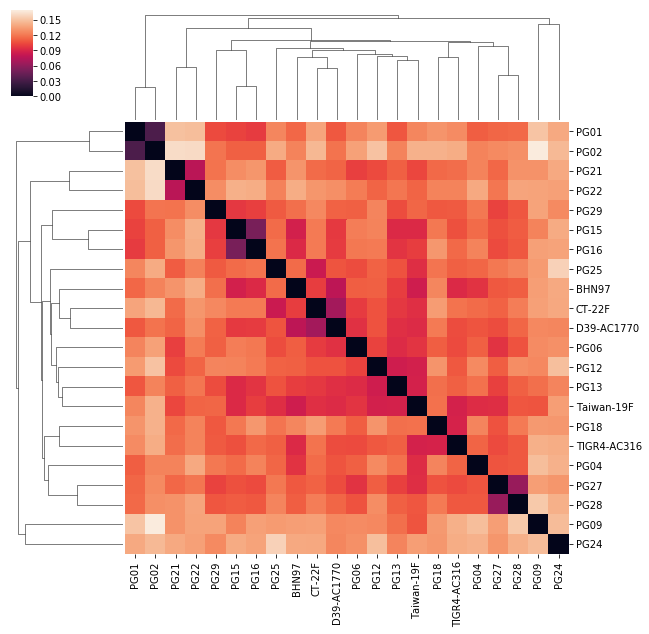

In [9]:
essentiality_dist = pd.DataFrame(squareform(pdist(essentiality_wide.transpose(), metric = "cosine")))
essentiality_dist.set_axis(list(essentiality_wide.columns), axis = 0, inplace = True)
essentiality_dist.set_axis(list(essentiality_wide.columns), axis = 1, inplace = True)
sns.clustermap(essentiality_dist)

D:\defne\Apps\Anaconda\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


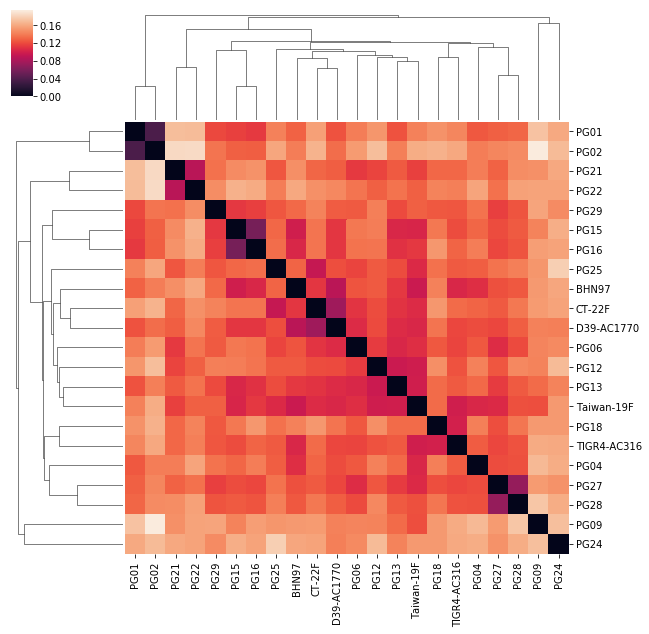

In [10]:
essentiality_dist = pd.DataFrame(squareform(pdist(essentiality_wide.transpose(), metric = "correlation")))
essentiality_dist.set_axis(list(essentiality_wide.columns), axis = 0, inplace = True)
essentiality_dist.set_axis(list(essentiality_wide.columns), axis = 1, inplace = True)
sns.clustermap(essentiality_dist)

Another possibility is repeating this using the categorical variable `Binomial.Call` with Hamming/Jaccard distance

D:\defne\Apps\Anaconda\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


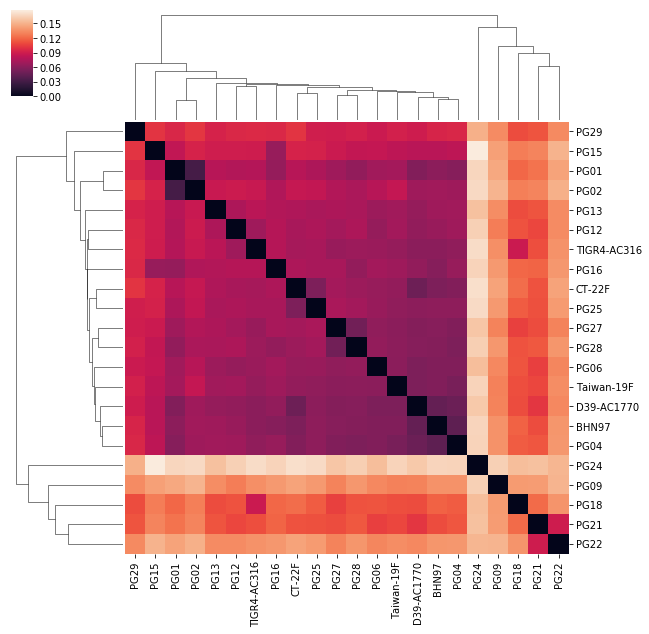

In [11]:
categorymap = {'Essential':1, 'Non-Essential':-1, 'Uncertain':0}

essentiality_cat = essentiality.replace({'Binomial.Call':categorymap})
essentiality_wide_cat = essentiality_cat.pivot_table(index = "MCL_Sub",
                                            columns = "Strain",
                                            values = "Binomial.Call")

essentiality_wide_cat.fillna(-1, inplace=True)

essentiality_dist_cat = pd.DataFrame(squareform(pdist(essentiality_wide_cat.transpose(), metric = "jaccard")))
essentiality_dist_cat.set_axis(list(essentiality_wide_cat.columns), axis = 0, inplace = True)
essentiality_dist_cat.set_axis(list(essentiality_wide_cat.columns), axis = 1, inplace = True)
sns.clustermap(essentiality_dist_cat)

D:\defne\Apps\Anaconda\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


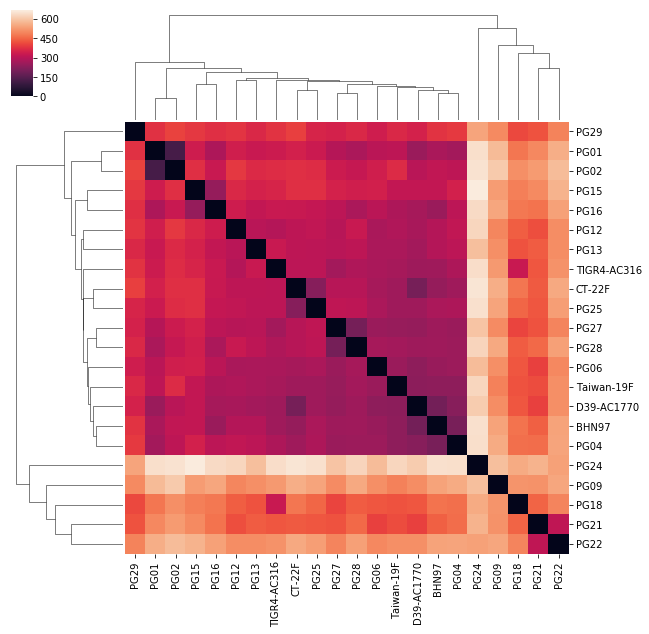

In [12]:
essentiality_dist_cat = pd.DataFrame(squareform(pdist(essentiality_wide_cat.transpose(), metric = "cityblock")))
essentiality_dist_cat.set_axis(list(essentiality_wide_cat.columns), axis = 0, inplace = True)
essentiality_dist_cat.set_axis(list(essentiality_wide_cat.columns), axis = 1, inplace = True)
sns.clustermap(essentiality_dist_cat)

D:\defne\Apps\Anaconda\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


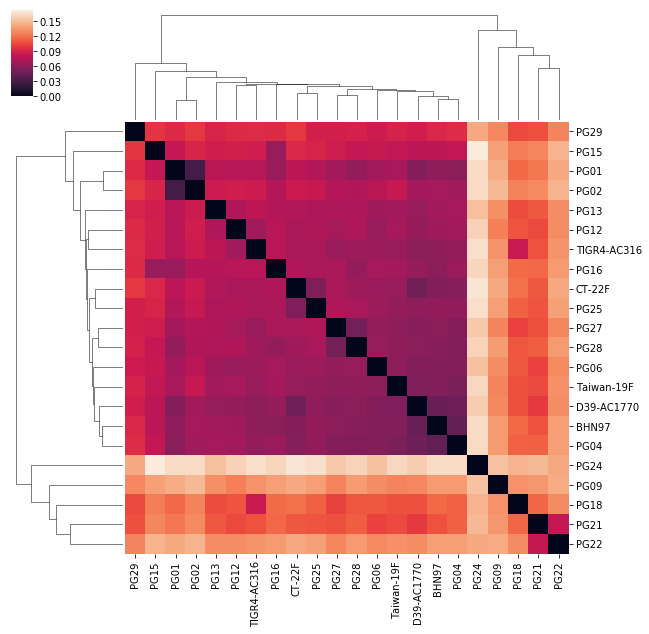

In [13]:
essentiality_dist_cat = pd.DataFrame(squareform(pdist(essentiality_wide_cat.transpose(), metric = "hamming")))
essentiality_dist_cat.set_axis(list(essentiality_wide_cat.columns), axis = 0, inplace = True)
essentiality_dist_cat.set_axis(list(essentiality_wide_cat.columns), axis = 1, inplace = True)
sns.clustermap(essentiality_dist_cat)

D:\defne\Apps\Anaconda\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


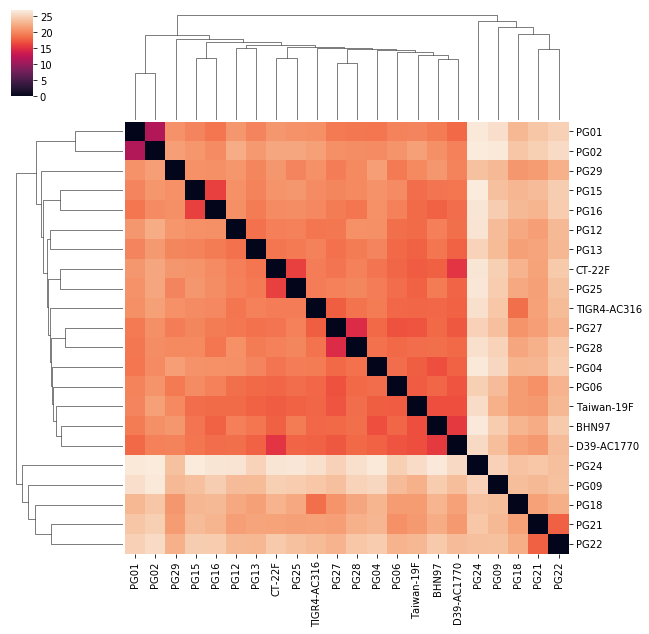

In [14]:
essentiality_dist_cat = pd.DataFrame(squareform(pdist(essentiality_wide_cat.transpose(), metric = "euclidean")))
essentiality_dist_cat.set_axis(list(essentiality_wide_cat.columns), axis = 0, inplace = True)
essentiality_dist_cat.set_axis(list(essentiality_wide_cat.columns), axis = 1, inplace = True)
sns.clustermap(essentiality_dist_cat)

Overall, all metrics seem to keep the pairs together. The categorical distances group very differently, so I will try all combinations below:
* Essentiality: numeric (zbar), Genomic: raw
* Essentiality: numeric, Genomic: no-recombination
* Essentiality: categorical, Genomic: raw
* Essentiality: categorical, Genomic: no-recombination

In [15]:
# load SNP distance data and filter
snpdists = pd.read_csv('./PG350_phylogenies/PG350_dists.txt', sep="\t", index_col = 0)
snpdists.rename({'PG1':'PG01', 'PG2':'PG02','PG4':'PG04','PG6':'PG06','PG9':'PG09'}, inplace=True, axis = 0)
snpdists.rename({'PG1':'PG01', 'PG2':'PG02','PG4':'PG04','PG6':'PG06','PG9':'PG09'}, inplace=True, axis = 1)
snpdists.iloc[:5,:5]

,PG01,PG10,PG100,PG101,PG102
snp-dists 0.7.0,,,,,
PG01,0,14887,14621,15238,14810
PG10,14887,0,14264,15914,15542
PG100,14621,14264,0,15948,15751
PG101,15238,15914,15948,0,14434
PG102,14810,15542,15751,14434,0


In [16]:
select_strains = list(essentiality_wide.columns)

snpdists.loc[select_strains, select_strains]

D:\defne\Apps\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


,BHN97,CT-22F,D39-AC1770,PG01,PG02,PG04,PG06,PG09,PG12,PG13,...,PG18,PG21,PG22,PG24,PG25,PG27,PG28,PG29,TIGR4-AC316,Taiwan-19F
snp-dists 0.7.0,,,,,,,,,,,,,,,,,,,,,
BHN97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CT-22F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D39-AC1770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PG01,NaN,NaN,NaN,0.0,232.0,14972.0,14290.0,14866.0,14752.0,14073.0,...,15230.0,15195.0,15236.0,14561.0,14028.0,14516.0,14356.0,14298.0,NaN,NaN
PG02,NaN,NaN,NaN,232.0,0.0,14832.0,14386.0,14776.0,14816.0,14158.0,...,15043.0,15127.0,15163.0,14558.0,13937.0,14547.0,14372.0,14261.0,NaN,NaN
PG04,NaN,NaN,NaN,14972.0,14832.0,0.0,14881.0,15456.0,15888.0,14151.0,...,15208.0,16260.0,16259.0,15611.0,15122.0,15349.0,15027.0,14962.0,NaN,NaN
PG06,NaN,NaN,NaN,14290.0,14386.0,14881.0,0.0,14336.0,15132.0,14236.0,...,14910.0,15197.0,15229.0,14194.0,13775.0,14444.0,14431.0,8143.0,NaN,NaN
PG09,NaN,NaN,NaN,14866.0,14776.0,15456.0,14336.0,0.0,15513.0,15560.0,...,15584.0,15978.0,15975.0,15122.0,15088.0,15118.0,14999.0,14875.0,NaN,NaN
PG12,NaN,NaN,NaN,14752.0,14816.0,15888.0,15132.0,15513.0,0.0,15161.0,...,16630.0,16042.0,16053.0,15534.0,15296.0,15393.0,15359.0,14842.0,NaN,NaN


In [17]:
# drop rows and columns that are all NaN
snpdists_filter = snpdists.loc[select_strains, select_strains]
snpdists_filter.dropna(axis=0, how="all", inplace=True)
snpdists_filter.dropna(axis=1, how="all", inplace=True)
snpdists_filter

D:\defne\Apps\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


,PG01,PG02,PG04,PG06,PG09,PG12,PG13,PG15,PG16,PG18,PG21,PG22,PG24,PG25,PG27,PG28,PG29
snp-dists 0.7.0,,,,,,,,,,,,,,,,,
PG01,0.0,232.0,14972.0,14290.0,14866.0,14752.0,14073.0,13383.0,13620.0,15230.0,15195.0,15236.0,14561.0,14028.0,14516.0,14356.0,14298.0
PG02,232.0,0.0,14832.0,14386.0,14776.0,14816.0,14158.0,13329.0,13554.0,15043.0,15127.0,15163.0,14558.0,13937.0,14547.0,14372.0,14261.0
PG04,14972.0,14832.0,0.0,14881.0,15456.0,15888.0,14151.0,14873.0,14701.0,15208.0,16260.0,16259.0,15611.0,15122.0,15349.0,15027.0,14962.0
PG06,14290.0,14386.0,14881.0,0.0,14336.0,15132.0,14236.0,14072.0,14264.0,14910.0,15197.0,15229.0,14194.0,13775.0,14444.0,14431.0,8143.0
PG09,14866.0,14776.0,15456.0,14336.0,0.0,15513.0,15560.0,14250.0,14074.0,15584.0,15978.0,15975.0,15122.0,15088.0,15118.0,14999.0,14875.0
PG12,14752.0,14816.0,15888.0,15132.0,15513.0,0.0,15161.0,14747.0,14744.0,16630.0,16042.0,16053.0,15534.0,15296.0,15393.0,15359.0,14842.0
PG13,14073.0,14158.0,14151.0,14236.0,15560.0,15161.0,0.0,14128.0,14238.0,15670.0,15420.0,15442.0,14449.0,13734.0,14272.0,14130.0,14500.0
PG15,13383.0,13329.0,14873.0,14072.0,14250.0,14747.0,14128.0,0.0,2018.0,15089.0,15294.0,15330.0,14552.0,14129.0,14408.0,14171.0,13981.0
PG16,13620.0,13554.0,14701.0,14264.0,14074.0,14744.0,14238.0,2018.0,0.0,14965.0,15398.0,15422.0,14736.0,14351.0,14553.0,14157.0,14176.0


D:\defne\Apps\Anaconda\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


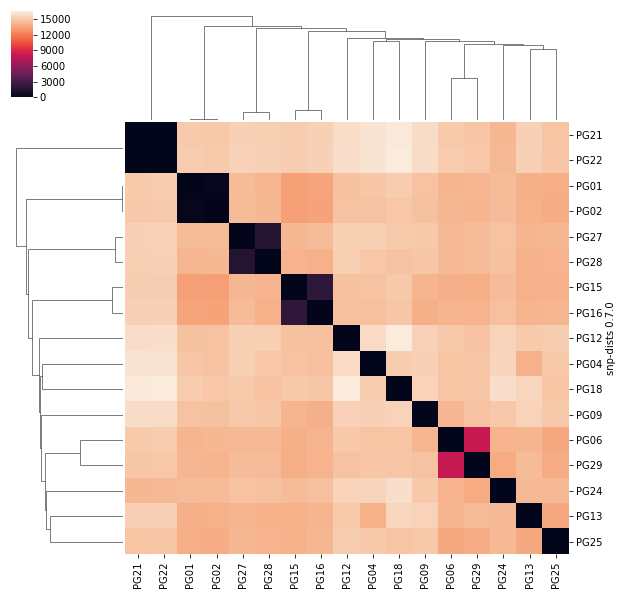

In [18]:
sns.clustermap(snpdists_filter)

In [19]:
essentiality_dist = pd.DataFrame(squareform(pdist(essentiality_wide.transpose(), metric = "euclidean")))
essentiality_dist_cat = pd.DataFrame(squareform(pdist(essentiality_wide_cat.transpose(), metric = "hamming")))

In [20]:
overlap_strains = list(snpdists_filter.columns)
essentiality_dist.set_axis(list(essentiality_wide.columns), axis = 0, inplace = True)
essentiality_dist.set_axis(list(essentiality_wide.columns), axis = 1, inplace = True)
essentiality_dist_cat.set_axis(list(essentiality_wide_cat.columns), axis = 0, inplace = True)
essentiality_dist_cat.set_axis(list(essentiality_wide_cat.columns), axis = 1, inplace = True)

essentiality_dist_filter = essentiality_dist.loc[overlap_strains, overlap_strains]
essentiality_dist_cat_filter = essentiality_dist_cat.loc[overlap_strains, overlap_strains]

Text(0,0.5,'Essentialome distance')

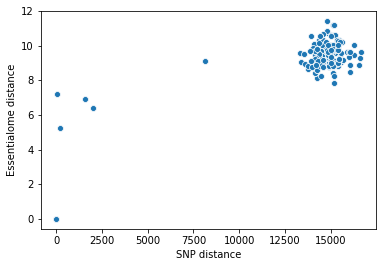

In [22]:
sns.scatterplot(y = essentiality_dist_filter.unstack(), x = snpdists_filter.unstack())
plt.xlabel("SNP distance")
plt.ylabel("Essentialome distance")

This looks promising as preliminary data, and supports my hypothesis that genetic similarity could predict essentialome profile. However, because of the imbalance between similar and divergent strains (i.e. only 5 pairs that have high similarity, and the remaining >150 comparisons being similarly divergent) it is difficult to say whether there is a correlation. 

(7, 12)

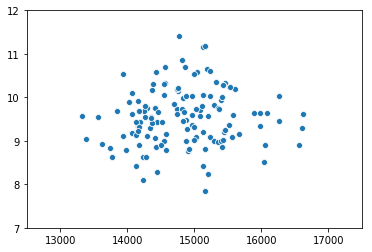

In [29]:
# zoom into the dense blob
sns.scatterplot(y = essentiality_dist_filter.unstack(), x = snpdists_filter.unstack())
plt.xlim(12500,17500)
plt.ylim(7,12)

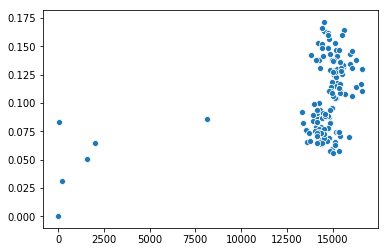

In [22]:
sns.scatterplot(y = essentiality_dist_cat_filter.unstack(), x = snpdists_filter.unstack())

(0.05, 0.175)

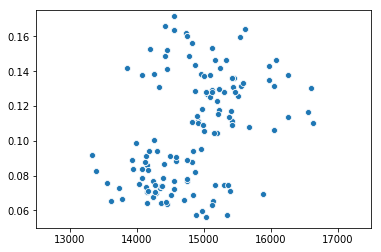

In [32]:
# zoom into the dense blob
sns.scatterplot(y = essentiality_dist_cat_filter.unstack(), x = snpdists_filter.unstack())
plt.xlim(12500,17500)
plt.ylim(0.05,0.175)

In [23]:
# load SNP distance data and filter
snpdists_norecomb = pd.read_csv('./PG350_phylogenies/PG350_norecomb_dists.txt', sep="\t", index_col = 0)
snpdists_norecomb.rename({'PG1':'PG01', 'PG2':'PG02','PG4':'PG04','PG6':'PG06','PG9':'PG09'}, inplace=True, axis = 0)
snpdists_norecomb.rename({'PG1':'PG01', 'PG2':'PG02','PG4':'PG04','PG6':'PG06','PG9':'PG09'}, inplace=True, axis = 1)

snpdists_norecomb_filter = snpdists_norecomb.loc[select_strains, select_strains]
snpdists_norecomb_filter.dropna(axis=0, how="all", inplace=True)
snpdists_norecomb_filter.dropna(axis=1, how="all", inplace=True)

D:\defne\Apps\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


D:\defne\Apps\Anaconda\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


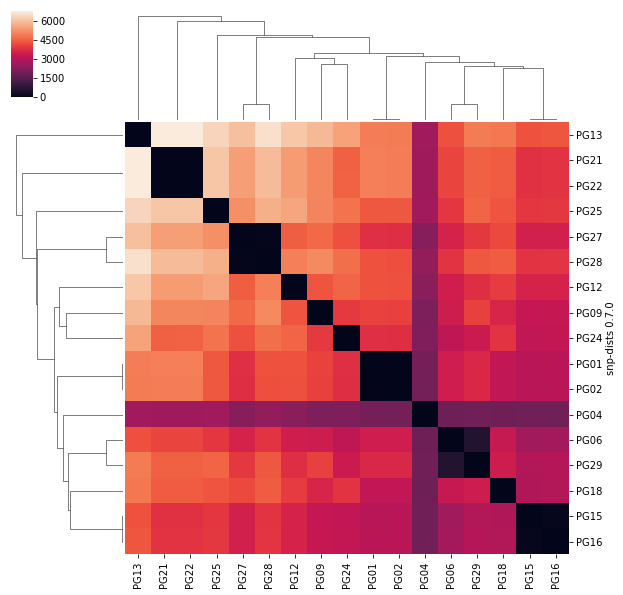

In [24]:
sns.clustermap(snpdists_norecomb_filter)

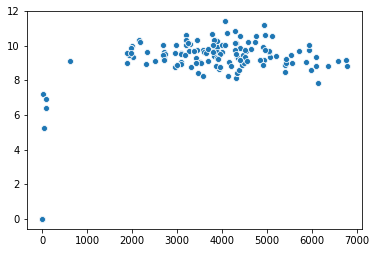

In [25]:
sns.scatterplot(y = essentiality_dist_filter.unstack(), x = snpdists_norecomb_filter.unstack())

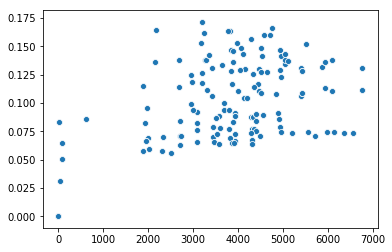

In [43]:
sns.scatterplot(y = essentiality_dist_cat_filter.unstack(), x = snpdists_norecomb_filter.unstack())


In [27]:
mydf = pd.DataFrame({'EssentialomeDistance':essentiality_dist_filter.unstack(),
                     'EssentialomeDistance_cat':essentiality_dist_cat_filter.unstack(),
                     'SNPDistance':snpdists_filter.unstack(),
                     'SNPDistance_norecomb':snpdists_norecomb_filter.unstack()
                    })
mydf.corr(method = "spearman")

,EssentialomeDistance,EssentialomeDistance_cat,SNPDistance,SNPDistance_norecomb
EssentialomeDistance,1.000000,0.601925,0.315398,0.167976
EssentialomeDistance_cat,0.601925,1.000000,0.505134,0.381105
SNPDistance,0.315398,0.505134,1.000000,0.378911
SNPDistance_norecomb,0.167976,0.381105,0.378911,1.000000


In [28]:
mydf.corr(method = "pearson")

,EssentialomeDistance,EssentialomeDistance_cat,SNPDistance,SNPDistance_norecomb
EssentialomeDistance,1.000000,0.726027,0.886029,0.622811
EssentialomeDistance_cat,0.726027,1.000000,0.659495,0.541144
SNPDistance,0.886029,0.659495,1.000000,0.739602
SNPDistance_norecomb,0.622811,0.541144,0.739602,1.000000


(1, 10000)

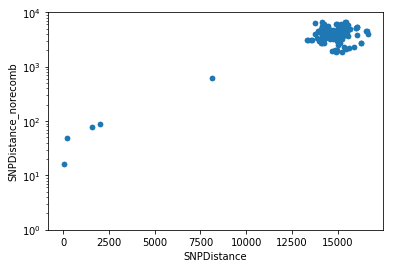

In [35]:
mydf.plot.scatter(x='SNPDistance', y='SNPDistance_norecomb')
plt.semilogy()
plt.ylim(1,10000)